In [30]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

# 5.2

In [31]:
sys.path.append('../External_Functions')                       # Add the folder with the functions to the path
from MyFunctions import *
matplotlib_plotparameters()                                    # Set the plot parameters to something nice

1726
(-0.606, 0.483)


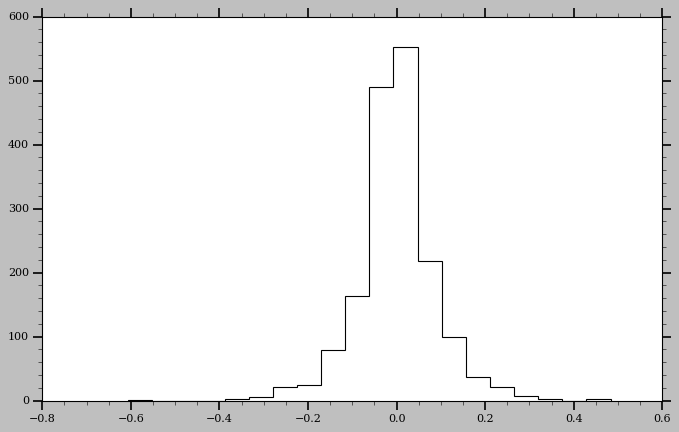

In [32]:
data = np.genfromtxt('data_TimingResiduals.txt')
res = data
print(len(res))
# plot the residuals
plt.figure(figsize=(10,6))
rms = np.std(res)
Nbins = 20
counts, counts_er, bin_centers, bin_width, dmin, dmax = hist_create(res, Nbins)
range=(dmin,dmax)
print(range)
# plt.errorbar(data, res, yerr=rms, fmt='o', label='Data')


In [34]:
hal = np.arange(0,len(res),1)
for x in hal:
  if x == 3: break
  print(x)

0
1
2


In [46]:
test_data = [9,10, 10, 10,11,50]
# print(test_data - np.mean(test_data)/np.std(test_data))
# Chauvanet's criterion
hal = np.arange(0,len(res),1)
def survival_function(x,sigma,z):
    return stats.norm.pdf(z,loc = 0, scale = sigma/np.sqrt(len(x)))




res_midl = res
for i in res:
    # 1. Compute the mean and standard deviation of the data
    mean = np.mean(res_midl)
    std = np.std(res_midl)

    # 2. Compute the z-score of each data point
    z_scores = (res_midl - mean) / std
    # plt.plot(hal,abs(z_scores),'o')

    # 3. Compute the probability of each z-score
    loc_prob = stats.norm.sf(abs(z_scores),loc = 0)

    # 4. Compute the global probability
    global_prob = 1-(1-loc_prob)**(len(res_midl))

    # 5. Get the outliers
    rip = np.argmax(abs(z_scores))

    if global_prob[rip] > 0.01:
        outlier = [rip,res_midl[rip],mean,z_scores[rip],global_prob[rip]]
        print(outlier)
        break

    outlier = [rip,res_midl[rip],mean,z_scores[rip],global_prob[rip]]
    print(outlier)

    # 6. Remove the outliers
    res_midl = np.delete(res_midl,rip)

# plt.hist(outliers,bins=Nbins,range=range)
plt.show


[537, -0.606, 0.00015295480880648878, -6.897656512212872, 4.562387578843641e-09]
[946, 0.483, 0.0005043478260869563, 5.566218294998109, 2.245295948144488e-05]
[428, 0.463, 0.0002244779582366588, 5.385787753410765, 6.217243727102417e-05]
[42, 0.354, -4.410911201392949e-05, 4.1542921166030675, 0.027719211531991084]


<function matplotlib.pyplot.show(*args, **kw)>